In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


# importing the sklearn things 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [6]:
data = pd.read_csv("c.csv")
data.head()

,x1,x2,y
0,0.336494,-0.985951,-1.0
1,-0.011043,-0.105529,1.0
2,0.238160,-0.617417,1.0
3,-0.366783,-0.713819,1.0
4,1.221923,-1.039399,-1.0


In [7]:
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fixing random seed 
np.random.seed(55)




In [9]:
from sklearn.model_selection import learning_curve

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

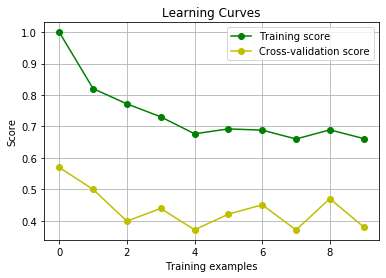

In [16]:
estimator = LogisticRegression()
draw_learning_curves(X,y, estimator, 10)

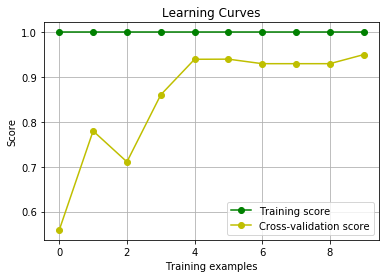

In [17]:
estimator = GradientBoostingClassifier()

draw_learning_curves(X,y, estimator, 10)

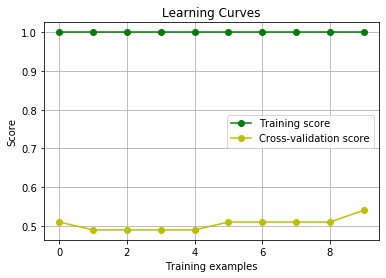

In [18]:
estimator = SVC(kernel='rbf', gamma=1000)

draw_learning_curves(X,y, estimator, 10)

In [ ]:
estimator = 